In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df=pd.read_csv("C:/Users/rubesh/Downloads/house price/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

In [4]:
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3997,720000.0,4,1.75,2530,5000,1.5,0,2,5,8,2070,460,1917,0,98103,47.6624,-122.348,1950,3600
13640,252000.0,3,1.00,1300,8184,2.0,0,0,3,6,1300,0,1947,0,98155,47.7469,-122.319,1120,8184
20110,436000.0,3,2.50,1150,1193,2.0,0,0,3,8,1020,130,2006,0,98107,47.6684,-122.365,1450,1640
3795,949000.0,4,2.75,2980,42253,1.0,0,0,4,9,1860,1120,1973,0,98005,47.6392,-122.163,2980,42253
7946,441500.0,2,1.75,1010,4000,1.5,0,0,5,7,1010,0,1919,0,98105,47.6665,-122.287,1470,4000
17096,525000.0,3,1.00,1560,8100,1.0,0,0,4,8,1140,420,1952,0,98177,47.7261,-122.364,2130,8100
19714,505000.0,4,2.50,2420,5006,2.0,0,0,3,8,2420,0,2013,0,98059,47.4795,-122.126,2750,5471
17898,430000.0,2,1.00,760,7114,1.0,0,0,3,6,760,0,1946,0,98103,47.7005,-122.352,780,7102
12299,345000.0,2,1.00,860,8250,1.0,0,0,3,7,860,0,1940,0,98133,47.7132,-122.334,1780,11200
11433,245000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='price', ylabel='Density'>

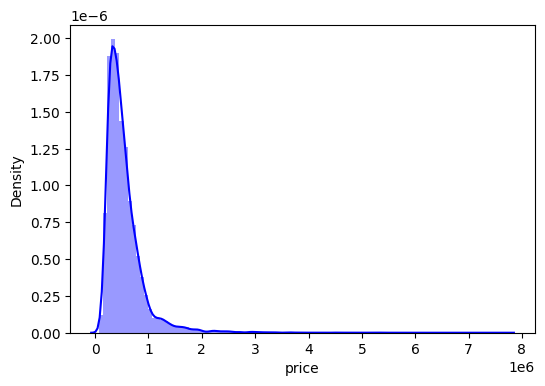

In [6]:
plt.figure(figsize=(6, 4))
sns.distplot(df['price'], color='b', bins=100, hist_kws={'alpha': 0.4})

In [7]:
from sklearn.model_selection import train_test_split,GridSearchCV
x = df.drop(columns = ['price'])
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=20)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

In [33]:
y_pred=rf.predict(x_test)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
acc=cross_val_score(estimator=rf,X=x,y=y,cv=2)
print("Mean_squared_error: ",sqrt(mse),"\nR2_score: ",r2)
print("MAE(in %):{:.2f}%".format(mae/y.mean()*100))
print("Standard deviation:{:.2f}".format(acc.std()*100))

Mean_squared_error:  145704.13021493444 
R2_score:  0.8595703448979609
MAE(in %):13.47%
Standard deviation:0.42


In [29]:
x_sample = x_train.sample(100)
explainer = shap.Explainer(rf, x_sample)
shap_values = explainer(x_sample)

 97%|=================== | 97/100 [00:23<00:00]       

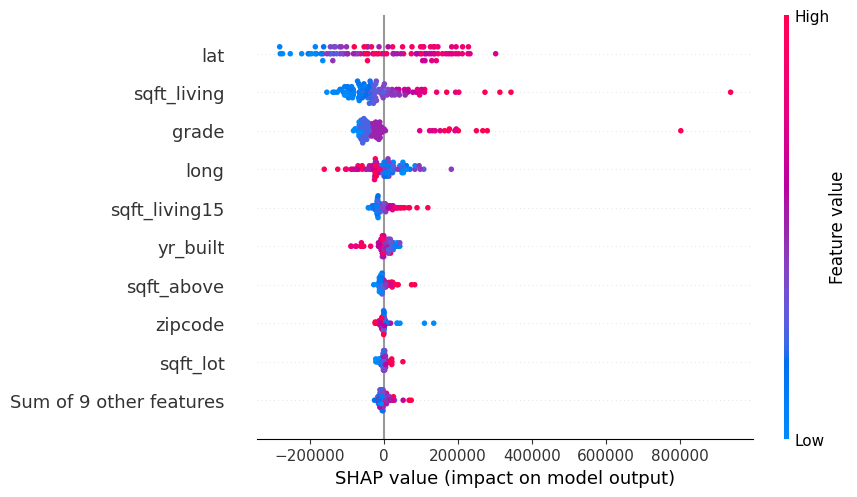

In [37]:
shap.plots.beeswarm(shap_values)

In [36]:
shap.initjs()
shap.plots.force(shap_values)